In [ ]:
import numpy as np
import rasterio as rio
import smca_model
from tqdm import tqdm

import SALib
from SALib.sample import sobol as sobol_sample
from SALib.analyze import sobol as sobol_analyse

In [47]:
problem = {
    'num_vars': 3,
    'names': ['ksat', 'wcs', 'altdev'],
    'bounds': [[0, 1],
               [0, 1],
               [0, 1]]
}

In [48]:
param_values = sobol_sample.sample(problem, 1024)

In [49]:
weights = [0.43, 0.14, 0.43]
types = [1, 1, 0]

In [50]:
Y = np.zeros((param_values.shape[0]))

for i, X in enumerate(tqdm(param_values)):
    Y[i] = smca_model.model(X[0], X[1], X[2], weights, types)

100%|██████████| 8192/8192 [00:00<00:00, 118865.09it/s]


In [61]:
Si = sobol_analyse.analyze(problem, Y, print_to_console=True)

              ST   ST_conf
ksat    0.474806  0.038768
wcs     0.050331  0.004817
altdev  0.474806  0.038104
              S1   S1_conf
ksat    0.474863  0.050518
wcs     0.050387  0.016611
altdev  0.474806  0.051984
                      S2   S2_conf
(ksat, wcs)    -0.000113  0.082758
(ksat, altdev) -0.000056  0.099084
(wcs, altdev)  -0.000056  0.030231


/home/vscode/.local/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


/home/vscode/.local/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

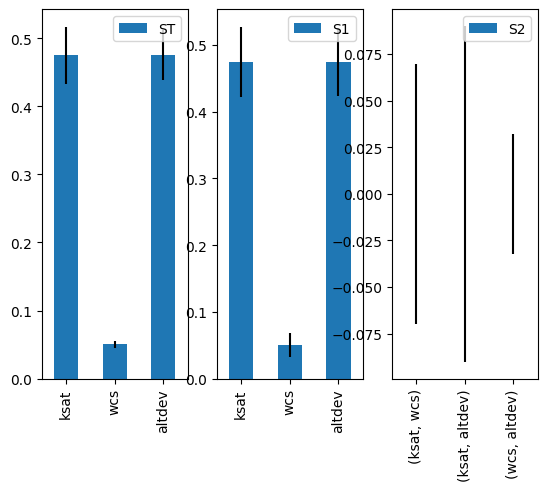

In [60]:
Si.plot()